In [118]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten

2.9.1


In [119]:
#(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()

In [120]:
#trainX.shape

In [121]:
#trainY.shape

In [122]:
#trainY = to_categorical(trainY)
#testY = to_categorical(testY)

In [123]:
#trainY.shape

In [124]:
#testY.shape

In [125]:
from tokenize import Number
import numpy as np
#np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

import time
from datetime import datetime
from datetime import timedelta
import math

In [ ]:
inicio = time.time()

In [126]:
#datos para la conexion a la base de datos
hostname = '82.180.175.58'
username = 'u813407238_lora'
password = 'Seguimiento_lora_123'
database = 'u813407238_seguimiento'

In [127]:
import MySQLdb
# inicialmente hace la conexion con la base de datos
myConnection = MySQLdb.connect( host=hostname, user=username, passwd=password, db=database )
import pandas as pd
# genera la lectura de la base de datos
dataset= pd.read_sql("SELECT * FROM LoRaWAN_messages_calle_5 order by id",myConnection)
print("Va a imprimir el dataset leido de la BD...")
#print(dataset)
#dataset[['COL 3','COL 4']].dtypes
#dataset = pd.DataFrame()
#dataset['T'] = dataset['date'] +' '+ dataset['time']
#dataset['date hour'] = dataset['date'] +' '+ dataset['hour']
#dataset = pd.to_datetime(dataset['date'] + dataset['time'])
print("Va a imprimir date y time...")

C:\Users\ander\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Va a imprimir el dataset leido de la BD...
Va a imprimir date y time...


In [128]:
#pip install mysqlclient

In [129]:
#dataset.head

In [130]:
dataset.drop(index=dataset[dataset['latitude']=='0'].index, inplace=True)

In [131]:
#dataset.info()

In [132]:
time = dataset['hour']

In [133]:
dataset

,id,dev_id,date,hour,latitude,longitude,speed,accx,accy,accz,gyrox,gyroy,gyroz,SF,BW,CR
17,18,tarjeta2-cubecell,2022-08-31,0 days 13:47:22,2.4494545,-76.6269796,0.62968,-0.1043366,-0.7579422,9.8896343,0.2024117,-0.2121214,0.0974049,7,125000,4/5
18,19,tarjeta2-cubecell,2022-08-31,0 days 13:47:33,2.4494231,-76.6269756,0,-0.1043366,-0.8920633,9.8225738,-0.041863,0.0474205,0.2042751,7,125000,4/5
19,20,tarjeta2-cubecell,2022-08-31,0 days 13:47:43,2.4493666,-76.6269073,0,-0.1211018,-0.7986575,9.7770684,0.2482132,-0.349526,0.0821378,7,125000,4/5
20,21,tarjeta2-cubecell,2022-08-31,0 days 13:47:54,2.4493663,-76.6268878,0,-0.1546321,-0.8369779,9.7722784,0.2482132,0.077955,0.1279393,7,125000,4/5
21,22,tarjeta2-cubecell,2022-08-31,0 days 13:48:06,2.4493705,-76.6268905,0,-0.1234968,-0.856138,9.8537091,0.324549,0.1084892,0.1890079,7,125000,4/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,275,tarjeta2-cubecell,2022-08-31,0 days 14:36:37,2.4503646,-76.6269323,24.13156,1.2033439,-2.9853105,7.638316,-0.4846112,-2.5938007,-2.5896177,7,125000,4/5
275,276,tarjeta2-cubecell,2022-08-31,0 days 14:36:48,2.4502795,-76.6266823,14.00112,-0.1091267,-6.2257719,11.5829132,-0.3930082,-8.9449462,13.8378629,7,125000,4/5
276,277,tarjeta2-cubecell,2022-08-31,0 days 14:37:26,2.4495106,-76.6269685,1.0186,-0.3198884,-3.7301616,10.454859,-0.0876646,-8.9449462,6.4027485,7,125000,4/5
277,278,tarjeta2-cubecell,2022-08-31,0 days 14:37:38,2.4494831,-76.6269721,0,2.4224089,-1.6872098,9.0681427,1.1642438,4.0321536,-1.6735874,7,125000,4/5


In [134]:
dataset['latitude']=dataset['latitude'].astype('float64')
dataset['longitude']=dataset['longitude'].astype('float64')

In [135]:
#dataset.info()

In [136]:
d = pd.DataFrame()
d['latitud']=dataset['latitude']
d['longitude']=dataset['longitude']
d.to_csv('calle_5_original.csv')

In [137]:
def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

In [138]:
time_step = 30

In [139]:
last = int(len(dataset)/5.0)

In [140]:
set_entrenamiento = dataset[:-last]
set_validacion = dataset[-last-time_step:]

In [141]:
#set_entrenamiento.info()

In [142]:
#set_validacion.info()

In [143]:
set_entrenamiento.reset_index(inplace=True, drop=True)
#set_entrenamiento

In [144]:
set_validacion.reset_index(inplace=True, drop=True)
#set_validacion

In [145]:
#set_validacion.info()

In [146]:
#set_entrenamiento.info()

In [147]:
x= np.column_stack((set_entrenamiento.iloc[:,[4]],set_entrenamiento.iloc[:,[5]],set_entrenamiento.iloc[:,[8]],set_entrenamiento.iloc[:,[12]]))

In [148]:
#x[0:1,:]

In [149]:
#x[0]

In [150]:
# Normalización del set de entrenamiento
sc1 = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc1.fit_transform(x)

In [151]:
#set_entrenamiento_latitud_escalado=x

In [152]:
#set_entrenamiento_latitud_escalado = np.array(set_entrenamiento_latitud_escalado).reshape(set_entrenamiento_latitud_escalado, ((set_entrenamiento_latitud_escalado.shape[0])/4), set_entrenamiento_latitud_escalado.shape[1], 4)

In [153]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

In [154]:
for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0:5])
    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0:5])

In [155]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [156]:
Y_train.shape

(180, 4)

In [157]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

In [158]:
X_train.shape

(180, 30, 4)

In [159]:
# Red LSTM
#Para crear la red debemos primero definir el tamaño de los datos de entrada y del dato de salida,
#así como el número total de neuronas (100):
dim_in = (X_train.shape[1],4)
dim_out = 4
neurons = 100

In [160]:
from keras.layers import Bidirectional
from tensorflow.keras.optimizers import SGD, Adam

In [161]:
def build_model(hp):
    #definicion de hiperparámetros a evaluar
    hp_batch_size = hp.Int('batch_size', min_value = 8, max_value = 128, step = 8)
    hp_seed = hp.Int('seed', min_value =0, max_value = 100, step = 1)
    hp_activation = hp.Choice('activation',['relu','tanh','linear','selu','elu','softmax'])
    recurrent_dropout = hp.Float('recurrent_dropout',min_value=0.0,max_value=0.99,default=0.2)
    hp_neurons = hp.Int('neurons1', min_value = 10, max_value = 200, step = 10)
    hp_neurons2 = hp.Int('neurons2', min_value = 10, max_value = 200, step = 10)
    hp_neurons3 = hp.Int('neurons3', min_value = 10, max_value = 200, step = 10)
    tf.random.set_seed(hp_seed)
    #definición del modelo de red neuronal
    modelo = Sequential()
    modelo.add(Bidirectional(LSTM(units=hp_neurons, activation=hp_activation, return_sequences=True, input_shape=dim_in)))
    modelo.add(Bidirectional(LSTM(hp_neurons2, activation=hp_activation, return_sequences=True)))
    modelo.add(Bidirectional(LSTM(hp_neurons3, activation=hp_activation, return_sequences=True)))
    #modelo.add(LSTM(200, activation=hp_activation,  return_sequences=True))
    modelo.add(Flatten())
    modelo.add(Dropout(recurrent_dropout))
    modelo.add(Dense(units=dim_out,activation=hp_activation))
    
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3])
    opt = Adam(learning_rate=hp_learning_rate)#, momentum=0.9)
    modelo.compile(optimizer=opt, loss='mse', metrics=['mse'])
    #modelo.compile(optimizer='Adam', loss='mse')
    #modelo.fit(X_train,Y_train,epochs=10,batch_size=32)
    #print(modelo.summary())
    return modelo

In [162]:
#pip install keras-tuner --upgrade

In [163]:
import keras_tuner

In [164]:
from keras_tuner.tuners import BayesianOptimization

In [165]:
tuner = BayesianOptimization(
    build_model,
    objective = 'mse',
    overwrite=True,
    max_trials = 6)

In [166]:
#definimos funcion de error y el método para minimizar
#modelo.compile(optimizer='RMSprop', loss='mse')

In [167]:
#implementamos el modelo con 20 iteraciones, epochs
#Presentando a la res lstm lotess de 32 datos
#modelo.fit(X_train,Y_train,epochs=500,batch_size=32)
#epochs 100  batch=64 loss 0.0017
#epochs 100  batch=32 loss 0.0040
#epochs 20  batch=32 loss 0.0071

In [168]:
#X_train.shape

In [169]:
#x_test_latitud = set_validacion.iloc[:,4:5]
x_test= np.column_stack((set_validacion.iloc[:,[4]],set_validacion.iloc[:,[5]],set_validacion.iloc[:,[8]],set_validacion.iloc[:,[12]]))

In [170]:
#x_test

In [171]:
array_latitud = []
for x in range(len(x_test)):
    array_latitud.append(x_test[x,0])

In [172]:
#array_latitud

In [173]:
array_longitud = []
for x in range(len(x_test)):
    array_longitud.append(x_test[x,1])

In [174]:
#array_longitud

In [175]:
#sc2 = MinMaxScaler(feature_range=(0,1))
x_test_n = sc1.transform(x_test)
#x_test_n

In [176]:
x_test_n.shape

(82, 4)

In [177]:
#Obtenemos bloques de 60 datos
X_test = []
Y_test = []
for i in range(time_step,len(x_test_n)):
    X_test.append(x_test_n[i-time_step:i,0:5])
    Y_test.append(x_test_n[i,0:5])

In [178]:
X_test = np.array(X_test)
X_test.shape

(52, 30, 4)

In [179]:
Y_test = np.array(Y_test)
Y_test.shape

(52, 4)

In [180]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],4))

In [181]:
#Y_train = to_categorical(Y_train)
#Y_test = to_categorical(Y_test)
X_train.shape

(180, 30, 4)

In [182]:
Y_train.shape

(180, 4)

In [183]:
tuner.search(X_train, Y_train,
             epochs=100,
             #overwrite=True,
             validation_data=(X_test, Y_test))
            #)

Trial 6 Complete [00h 02m 39s]
mse: 0.01685408689081669

Best mse So Far: 0.007935685105621815
Total elapsed time: 00h 16m 09s
INFO:tensorflow:Oracle triggered exit


In [184]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
batch_size: 48
seed: 11
activation: relu
recurrent_dropout: 0.4991699742949213
neurons1: 200
neurons2: 200
neurons3: 180
learning_rate: 0.001
Score: 0.007935685105621815
Trial summary
Hyperparameters:
batch_size: 72
seed: 94
activation: relu
recurrent_dropout: 0.10720203786872651
neurons1: 160
neurons2: 190
neurons3: 110
learning_rate: 0.01
Score: nan
Trial summary
Hyperparameters:
batch_size: 24
seed: 5
activation: relu
recurrent_dropout: 0.03823224481735663
neurons1: 70
neurons2: 190
neurons3: 130
learning_rate: 0.001
Score: 0.007352656219154596
Trial summary
Hyperparameters:
batch_size: 40
seed: 57
activation: relu
recurrent_dropout: 0.7073492574358197
neurons1: 80
neurons2: 180
neurons3: 200
learning_rate: 0.001
Score: 0.008719271048903465
Trial summary
Hyperparameters:
batch_size: 88
seed: 10
activation: tanh
recurrent_dropout: 0.8181318938203229
neurons1: 160
neurons2: 70
neurons3:

In [185]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_hps.values

{'batch_size': 48,
 'seed': 11,
 'activation': 'relu',
 'recurrent_dropout': 0.4991699742949213,
 'neurons1': 200,
 'neurons2': 200,
 'neurons3': 180,
 'learning_rate': 0.001}

In [186]:
modelo = tuner.hypermodel.build(best_hps)
history = modelo.fit(X_train, Y_train,
                      epochs=100,batch_size=32,
                      validation_data=(X_test, Y_test))

Epoch 1/100
6/6 [==============================] - 8s 516ms/step - loss: 0.1959 - mse: 0.1959 - val_loss: 0.1524 - val_mse: 0.1524
Epoch 2/100
6/6 [==============================] - 2s 383ms/step - loss: 0.1048 - mse: 0.1048 - val_loss: 0.0775 - val_mse: 0.0775
Epoch 3/100
6/6 [==============================] - 2s 385ms/step - loss: 0.0654 - mse: 0.0654 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 4/100
6/6 [==============================] - 2s 383ms/step - loss: 0.0528 - mse: 0.0528 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 5/100
6/6 [==============================] - 2s 379ms/step - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 6/100
6/6 [==============================] - 2s 405ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0310 - val_mse: 0.0310
Epoch 7/100
6/6 [==============================] - 3s 423ms/step - loss: 0.0239 - mse: 0.0239 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 8/100
6/6 [==============================] - 3s 417ms/step - loss: 0.0190 - m

6/6 [==============================] - 2s 390ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 64/100
6/6 [==============================] - 2s 393ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 65/100
6/6 [==============================] - 2s 417ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 66/100
6/6 [==============================] - 2s 396ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 67/100
6/6 [==============================] - 2s 390ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 68/100
6/6 [==============================] - 2s 392ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 69/100
6/6 [==============================] - 2s 391ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 70/100
6/6 [==============================] - 2s 390ms/step - loss: 0.0089 - mse: 0

In [187]:
# evaluate model
_, acc = modelo.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 1.192


In [188]:
#Predecimos y normalizamos
prediccion = modelo.predict(X_test)

2/2 [==============================] - 1s 60ms/step


In [189]:
prediccion

array([[0.92275274, 0.06834222, 0.50155836, 0.5610313 ],
       [0.9310613 , 0.05480573, 0.51188636, 0.564778  ],
       [0.89732087, 0.07349171, 0.52766746, 0.5657032 ],
       [0.8435405 , 0.11088346, 0.5452486 , 0.566448  ],
       [0.7880565 , 0.1585444 , 0.5688965 , 0.5700278 ],
       [0.72278875, 0.22427653, 0.59145   , 0.5701424 ],
       [0.66796756, 0.2924623 , 0.61461705, 0.57050836],
       [0.60686785, 0.37043738, 0.62437177, 0.5649462 ],
       [0.5601612 , 0.44831327, 0.6354543 , 0.56382   ],
       [0.5253648 , 0.51953197, 0.6311488 , 0.5638808 ],
       [0.4972617 , 0.58180535, 0.61473763, 0.5641981 ],
       [0.45285156, 0.6658902 , 0.6017115 , 0.5737604 ],
       [0.42473423, 0.7008858 , 0.5659127 , 0.57143015],
       [0.4013975 , 0.7334708 , 0.5486437 , 0.5776965 ],
       [0.3790615 , 0.734818  , 0.5230427 , 0.57272136],
       [0.36245695, 0.73951155, 0.5306339 , 0.5755114 ],
       [0.33304754, 0.7370561 , 0.53962326, 0.5700626 ],
       [0.23070467, 0.7976282 ,

In [190]:
#prediccion[0][1]

In [191]:
'''nw = list()
for x in range(0,len(prediccion)):
    new_item = list()
    new_item.append(prediccion, [[0],[0]], axis=1)
    nw.append(new_item)
nw = np.array(nw)'''

'nw = list()\nfor x in range(0,len(prediccion)):\n    new_item = list()\n    new_item.append(prediccion, [[0],[0]], axis=1)\n    nw.append(new_item)\nnw = np.array(nw)'

In [192]:
#nw

In [193]:
prediccion = sc1.inverse_transform(prediccion)
prediccion.shape

(52, 4)

In [194]:
X_test.shape

(52, 30, 4)

In [195]:
prediccion

array([[ 2.4521055e+00, -7.6630806e+01, -1.8689388e+00,  5.0656706e-01],
       [ 2.4521413e+00, -7.6630936e+01, -1.7400161e+00,  7.7724385e-01],
       [ 2.4519963e+00, -7.6630760e+01, -1.5430231e+00,  8.4408730e-01],
       [ 2.4517651e+00, -7.6630417e+01, -1.3235602e+00,  8.9789200e-01],
       [ 2.4515266e+00, -7.6629974e+01, -1.0283679e+00,  1.1565160e+00],
       [ 2.4512460e+00, -7.6629356e+01, -7.4683607e-01,  1.1647923e+00],
       [ 2.4510102e+00, -7.6628731e+01, -4.5764518e-01,  1.1912317e+00],
       [ 2.4507477e+00, -7.6628014e+01, -3.3587858e-01,  7.8939563e-01],
       [ 2.4505470e+00, -7.6627289e+01, -1.9753711e-01,  7.0803630e-01],
       [ 2.4503975e+00, -7.6626625e+01, -2.5128177e-01,  7.1242851e-01],
       [ 2.4502766e+00, -7.6626045e+01, -4.5613998e-01,  7.3534983e-01],
       [ 2.4500856e+00, -7.6625267e+01, -6.1874294e-01,  1.4261723e+00],
       [ 2.4499648e+00, -7.6624947e+01, -1.0656135e+00,  1.2578255e+00],
       [ 2.4498646e+00, -7.6624649e+01, -1.2811799e

In [196]:
calle_5 = pd.DataFrame(prediccion[:,0:2])

In [197]:
calle_5.to_csv('calle_5.csv')

In [198]:
array_latitud_p = []
for x in range(len(prediccion)):
    array_latitud_p.append(prediccion[x,0])

In [199]:
array_longitud_p = []
for x in range(len(prediccion)):
    array_longitud_p.append(prediccion[x,1])

In [200]:
#array_latitud_p

In [201]:
#array_longitud_p

In [202]:
# Funciones auxiliares
def graficar_predicciones(real, prediccion,titulo):
    plt.plot(real[time_step:len(array_latitud)], color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
   # plt.ylim(-44,-43)
    plt.xlabel('Número de mediciones')
    plt.ylabel('Grados')
    plt.title(titulo)
    plt.legend()
    plt.show()

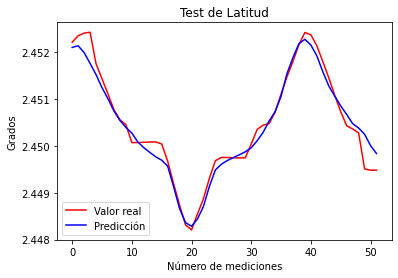

In [203]:
# Graficar resultados
graficar_predicciones(array_latitud,array_latitud_p,'Test de Latitud')

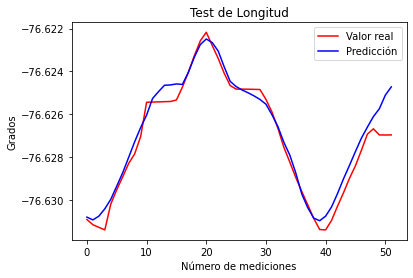

In [204]:
graficar_predicciones(array_longitud,array_longitud_p, 'Test de Longitud')

In [205]:
from sklearn.metrics import mean_squared_error

In [206]:
mse_lat = mean_squared_error(array_latitud[time_step:],array_latitud_p, squared=False)

In [207]:
mse_lat

0.00022503935716268583

In [208]:
mse_lon = mean_squared_error(array_longitud[time_step:],array_longitud_p, squared=False)

In [209]:
mse_lon

0.0005999744301638697

In [210]:
haversine(0.00000,0.00000,mse_lat,mse_lon)

0.07127269527148426

In [211]:
#Prediccion con los primeros datos del set de validacion
# Using predicted values to predict next step
X_pred = x_test_n.copy()
for i in range(time_step,len(X_pred)):
    xin = X_pred[i-time_step:i].reshape(1, time_step, 4)
    X_pred[i] = modelo.predict(xin)

1/1 [==============================] - 0s 15ms/step


In [212]:
len(X_pred)

82

In [213]:
X_pred

array([[0.87705013, 0.10923381, 0.17056792, 0.61644123],
       [0.96763987, 0.03695467, 0.36070606, 0.50422652],
       [0.966593  , 0.01033176, 0.38066002, 0.59319524],
       [0.88512272, 0.08518035, 0.58326939, 0.60333895],
       [0.82894033, 0.13532771, 0.43668458, 0.58199491],
       [0.74083983, 0.21419241, 0.605142  , 0.53043109],
       [0.66067233, 0.28226111, 0.34113585, 0.53043109],
       [0.56808189, 0.36875857, 0.96815043, 0.59868975],
       [0.5274398 , 0.4545327 , 0.65138144, 0.49133557],
       [0.52515994, 0.53791011, 0.5821182 , 0.54015214],
       [0.48005118, 0.62539001, 1.        , 0.61749787],
       [0.42065837, 0.67348613, 0.22256332, 0.68977174],
       [0.33611725, 0.73658868, 0.60571759, 0.46956888],
       [0.2439223 , 0.80097596, 0.17824252, 0.51923075],
       [0.14439921, 0.87846956, 0.56197239, 0.54945053],
       [0.05569385, 0.9421443 , 0.39543362, 0.61728654],
       [0.00604862, 0.99774364, 0.56312358, 1.        ],
       [0.07930673, 0.9451132 ,

In [214]:
xin.shape

(1, 30, 4)

In [215]:
prediccion2 = sc1.inverse_transform(X_pred)

In [216]:
# Funciones auxiliares
def graficar_predicciones2(real, prediccion,campo,title):
    plt.plot(real[0:len(real)], color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
    #plt.ylim(-44,-43)
    plt.title(title)
    plt.xlabel('Numero de mediciones')
    plt.ylabel(campo)
    plt.legend()
    plt.show()

In [217]:
prediccion2

array([[ 2.45190910e+00, -7.66304280e+01, -6.00064010e+00,
         4.50961870e+00],
       [ 2.45229850e+00, -7.66310975e+01, -3.62717580e+00,
        -3.59725140e+00],
       [ 2.45229400e+00, -7.66313441e+01, -3.37809370e+00,
         2.83022920e+00],
       [ 2.45194380e+00, -7.66306508e+01, -8.48953000e-01,
         3.56305360e+00],
       [ 2.45170230e+00, -7.66301863e+01, -2.67874800e+00,
         2.02106900e+00],
       [ 2.45132360e+00, -7.66294558e+01, -5.75920700e-01,
        -1.70412170e+00],
       [ 2.45097900e+00, -7.66288253e+01, -3.87146770e+00,
        -1.70412170e+00],
       [ 2.45058100e+00, -7.66280241e+01,  3.95545600e+00,
         3.22717590e+00],
       [ 2.45040630e+00, -7.66272296e+01,  1.27890000e-03,
        -4.52854910e+00],
       [ 2.45039650e+00, -7.66264573e+01, -8.63323100e-01,
        -1.00183160e+00],
       [ 2.45020260e+00, -7.66256470e+01,  4.35302920e+00,
         4.58595460e+00],
       [ 2.44994730e+00, -7.66252015e+01, -5.35158980e+00,
      

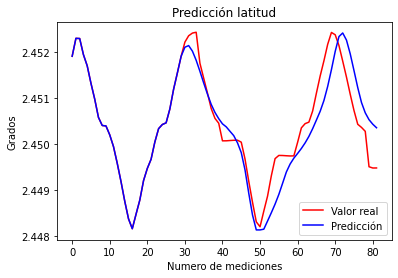

In [218]:
# Graficar resultados de prediccion de valores futuros
graficar_predicciones2(array_latitud,prediccion2[:,0:1],'Grados','Predicción latitud')

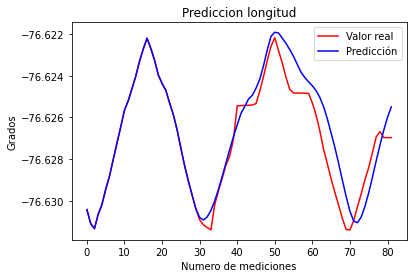

In [219]:
graficar_predicciones2(array_longitud,prediccion2[:,1:2],'Grados','Prediccion longitud')

In [220]:
mse_lat_p = mean_squared_error(array_latitud[time_step:],prediccion2[time_step:,0:1], squared=False)

In [221]:
mse_lat_p

0.000534638046641044

In [222]:
mse_lon_p = mean_squared_error(array_longitud[time_step:],prediccion2[time_step:,1:2], squared=False)

In [223]:
mse_lon_p

0.0011150775206401138

In [224]:
haversine(0.00000,0.00000,mse_lat_p,mse_lon_p)

0.13754492316259756

In [225]:
calle_5_p = pd.DataFrame(prediccion2[:,0:2])

In [226]:
calle_5_p.to_csv('calle_5_p.csv')

In [ ]:
fin = time.time()

In [ ]:
print(fin-inicio)

In [227]:
distancia_entrenamiento = []
distancia_entrenamiento.append(0)
for i in range(0, len(set_entrenamiento)-1):
    distancia_entrenamiento.append(haversine(set_entrenamiento.iat[i,4],set_entrenamiento.iat[i,5],set_entrenamiento.iat[i+1,4],set_entrenamiento.iat[i+1,5]))

In [228]:
d_d_e = pd.DataFrame(distancia_entrenamiento, columns=['distancia'])
d_d_e

,distancia
0,0.000000
1,0.003521
2,0.009854
3,0.002167
4,0.000555
...,...
205,0.096939
206,0.099985
207,0.094909
208,0.084733


In [229]:
len(distancia_entrenamiento)

210

In [230]:
distancia_validacion = []
distancia_validacion.append(0)
for i in range(0, len(set_validacion)-1):
    distancia_validacion.append(haversine(set_validacion.iat[i,4],set_validacion.iat[i,5],set_validacion.iat[i+1,4],set_validacion.iat[i+1,5]))

In [231]:
d_d_v = pd.DataFrame(distancia_validacion, columns=['distancia'])
d_d_v

,distancia
0,0.000000
1,0.086087
2,0.027408
3,0.086329
4,0.058188
...,...
77,0.083498
78,0.029349
79,0.091244
80,0.003085


In [232]:
time_entrenamiento = set_entrenamiento['hour']
time_entrenamiento.head(10)

0   0 days 13:47:22
1   0 days 13:47:33
2   0 days 13:47:43
3   0 days 13:47:54
4   0 days 13:48:06
5   0 days 13:48:18
6   0 days 13:48:30
7   0 days 13:48:41
8   0 days 13:48:52
9   0 days 13:49:04
Name: hour, dtype: timedelta64[ns]

In [233]:
time_validacion = set_validacion['hour']
time_validacion

0    0 days 14:21:28
1    0 days 14:21:39
2    0 days 14:21:50
3    0 days 14:22:01
4    0 days 14:22:10
           ...      
77   0 days 14:36:37
78   0 days 14:36:48
79   0 days 14:37:26
80   0 days 14:37:38
81   0 days 14:37:49
Name: hour, Length: 82, dtype: timedelta64[ns]

In [234]:
data = pd.read_csv('LoRaWAN_messages_calle_5.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'LoRaWAN_messages_calle_5.csv'

In [ ]:
data

In [ ]:
#data.drop(['hour'], axis=1, inplace=True)

In [ ]:
import random
xi=[random.randint(9,14) for p in range (0,309)]
len(xi)

In [ ]:
xi[0]

In [ ]:
hora = time_validacion[9:10,]
hora

In [ ]:
hora = time_validacion[9:10,]
hora2 = []*400
for i in range(0,len(xi)):
    h = (hora + timedelta(seconds=xi[i]))
    hora2.append(h)
    hora = hora2[i]

In [ ]:
hora2

In [ ]:
hora3 = pd.DataFrame(hora2)

In [ ]:
hora3

In [ ]:
data['hour'] = hora2

In [ ]:
data.to_csv('dcalle5.csv')

In [ ]:
#Calcula la diferencia de tiempo entre puntos de ubicacion
medida_de_tiempo_entrenamiento = []
for i in range(0,len(time_entrenamiento)-1):
    medida_de_tiempo_entrenamiento.append(time_entrenamiento[i+1]-time_entrenamiento[i])
medida_de_tiempo_entrenamiento

In [ ]:
min(medida_de_tiempo_entrenamiento)

In [ ]:
h = datetime.now()
h.hour

In [ ]:
h

In [ ]:
h.minute

In [ ]:

t = timedelta(
    days=0,
    seconds=h.second,
    microseconds=0,
    milliseconds=0,
    minutes=h.minute,
    hours=h.hour,
    weeks=0 )

In [ ]:
t

In [ ]:
#Calcula la diferencia de tiempo entre puntos de ubicacion
medida_de_tiempo_validacion = []
for i in range(0,len(time_validacion)-1):
    medida_de_tiempo_validacion.append(time_validacion[i+1]-time_validacion[i])
medida_de_tiempo_validacion

In [ ]:
len(medida_de_tiempo_validacion)

In [ ]:
#Creamos un objeto deltatime de valor 1 segundo
#Al dividir deltatime / deltatime se obtiene un valor de tipo float
#Al dividir sobre un segundo se obtiene un valor de tiempo en segundos
delta = timedelta(
    days=0,
    seconds=1,
    microseconds=0,
    milliseconds=0,
    minutes=0,
    hours=0,
    weeks=0 )

In [ ]:
duracion_entrenamiento = []
duracion_entrenamiento.append(10)
for i in range(0,len(medida_de_tiempo_entrenamiento)):
    duracion_entrenamiento.append(medida_de_tiempo_entrenamiento[i]/delta)
duracion_entrenamiento

In [ ]:
#index = duracion_entrenamiento.index(1)
#index

In [ ]:
len(duracion_entrenamiento)

In [ ]:
n_e= np.column_stack((duracion_entrenamiento,distancia_entrenamiento))

In [ ]:
n_e

In [ ]:
duracion_validacion = []
duracion_validacion.append(10)
for i in range(0,len(medida_de_tiempo_validacion)):
    duracion_validacion.append(medida_de_tiempo_validacion[i]/delta)
duracion_validacion

In [ ]:
#index = duracion_validacion.index(20)
#len(duracion_validacion)-index-309+5

In [ ]:
n_v= np.column_stack((duracion_validacion,distancia_validacion))

In [ ]:
n_v

In [ ]:
duracion_data_entrenamiento = pd.DataFrame(duracion_entrenamiento, columns=['duracion'])
duracion_data_entrenamiento

In [ ]:
duracion_data_validacion = pd.DataFrame(duracion_validacion, columns=['duracion'])
duracion_data_validacion

In [ ]:
#normalizamos
sc = MinMaxScaler(feature_range=(0,1))
time_entrenamiento_escalado = sc.fit_transform(n_e)

In [ ]:
#normalizamos
#sc2 = MinMaxScaler(feature_range=(0,1))
#time_validacion_escalado = sc2.transform(duracion_data_validacion)

In [ ]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step_t = 30
X_train_duracion = []
Y_train_duracion = []
n = len(n_e)

In [ ]:
for i in range(time_step,n):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train_duracion.append(time_entrenamiento_escalado[i-time_step:i,0:2])
    # Y: el siguiente dato
    Y_train_duracion.append(time_entrenamiento_escalado[i,0:2])

In [ ]:
X_train_duracion, Y_train_duracion = np.array(X_train_duracion), np.array(Y_train_duracion)

In [ ]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train_duracion = np.reshape(X_train_duracion, (X_train_duracion.shape[0], X_train_duracion.shape[1], 2))

In [ ]:
# Red LSTM
#Para crear la red debemos primero definir el tamaño de los datos de entrada y del dato de salida,
#así como el número total de neuronas (50):
dim_entrada_duracion = (X_train_duracion.shape[1],2)
dim_salida_duracion = 2
na_duracion = 100

In [ ]:
#Cear un contenedor usando el módulo Sequential:
modelo_duracion = Sequential()
#añadimos el modelo
modelo_duracion.add(LSTM(units=na_duracion, return_sequences=True, input_shape=dim_entrada_duracion))
#agregamos una capa lSTM
modelo_duracion.add(LSTM(units=na_duracion))
#evitamos el sobreentrtenamiento con dropout
modelo_duracion.add(Dropout(0.2))
#Dense para la capa de salida
modelo_duracion.add(Dense(units=dim_salida_duracion))

In [ ]:
#definimos funcion de error y el método para minimizar
modelo_duracion.compile(optimizer='rmsprop', loss='mse')

In [ ]:
#implementamos el modelo con 20 iteraciones, epochs
#Presentando a la res lstm lotess de 32 datos
modelo_duracion.fit(X_train_duracion,Y_train_duracion,epochs=100,batch_size=32)

In [ ]:
x_test = duracion_data_validacion.values
x_test

In [ ]:
x_test = sc.transform(n_v)
x_test

In [ ]:
#Obtenemos bloques de 60 datos
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0:2])

In [ ]:
X_test = np.array(X_test)
X_test.shape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],2))

In [ ]:
#Predecimos y normalizamos
prediccion_tiempo = modelo_duracion.predict(X_test)
prediccion_tiempo = sc.inverse_transform(prediccion_tiempo)
prediccion_tiempo.shape

In [ ]:
prediccion_tiempo

In [ ]:
# Funciones auxiliares
def graficar_predicciones3(real, prediccion,campo):
    plt.plot(real[0:len(prediccion)], 'o',   color='red', label='Valor real')
    plt.plot(prediccion,'o', color='blue', label='Predicción')
    #plt.ylim(9,15)
    #plt.xlim(40,50)
    plt.xlabel('Número de mediciones')
    plt.ylabel(campo)
    plt.title('Predicción de tiempo entre mediciones')
    plt.legend()
    plt.show()

In [ ]:
# Graficar resultados
graficar_predicciones3(n_v[:,0:1],prediccion_tiempo[:,0:1],'segundos')

In [ ]:
n_v_t = sc.transform(n_v)

In [ ]:
#Prediccion con los primeros datos del set de validacion
# Using predicted values to predict next step
X_pred_t = n_v_t.copy()
for i in range(time_step_t,len(X_pred_t)):
    xin_t = X_pred_t[i-time_step_t:i].reshape(1, time_step_t, 2)
    X_pred_t[i] = modelo_duracion.predict(xin_t)

In [ ]:
X_pred_t

In [ ]:
prediccion2 = sc.inverse_transform(X_pred_t)

In [ ]:
# Graficar resultados de prediccion de valores futuros
graficar_predicciones3(n_v[:,0:1],prediccion2[:,0:1],'segundos')

In [ ]:
mse_t = mean_squared_error(n_v[time_step_t:,0:1] ,prediccion2[time_step_t:,0:1], squared=False)

In [ ]:
mse_t

In [ ]:
n_v[time_step_t:,0:1]

In [ ]:
prediccion2[time_step_t:,0:1]